# Using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.


A look at the data Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season :

    Download 'nba_2013.csv' file from this link:
    https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
    
Here are some selected columns from the data:

    player - name of the player
    pos - the position of the player
    g - number of games the player was in
    gs - number of games the player started
    pts - total points the player scored
    
There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.
We can read our dataset in and figure out which columns are present:

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nba= pd.read_csv('nba_2013.csv')
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
# identify if any missing values
df_na = (nba.isnull().sum() / len(nba)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio
x3p.,13.929314
ft.,4.158004
x2p.,0.623701
efg.,0.415800
fg.,0.415800


In [4]:
nba['efg.'] = nba['efg.'].fillna(0)

In [5]:
nba['x2p.'] = nba['x2p.'].fillna(0)

In [6]:
nba['ft.'] = nba['ft'].fillna(0)

In [7]:
nba['x3p.'] = nba['x3p'].fillna(0)


In [8]:
nba['fg.']= nba['fg'].fillna(0)

In [9]:
# identify if any missing values
df_na = (nba.isnull().sum() / len(nba)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio


In [10]:
nba.shape

(481, 31)

In [11]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

nba.drop(['season_end','season','player'], axis = 1, inplace = True)
# Encode labels in column ''. 
nba['pos']= label_encoder.fit_transform(nba['pos']) 
nba['bref_team_id']= label_encoder.fit_transform(nba['bref_team_id']) 

In [12]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(nba, test_size = 0.2)

train_x = train.drop('pts', axis=1)
train_y = train['pts']

test_x = test.drop('pts', axis = 1)
test_y = test['pts']

In [13]:
for col in train_x.columns:
    print('Number of unique Values:' , col)
    print(train_x[col].unique())
    print('\n')


Number of unique Values: pos
[3 0 6 4 5 1 2]


Number of unique Values: age
[27 24 23 22 32 25 28 37 19 21 35 31 33 29 30 36 34 26 38 20 39]


Number of unique Values: bref_team_id
[25  8 24 16  2 18 23 12 28 27 19 29 30 17 15  7  6 10  3 26 22 13  0  4
 11 21 20  9 14  1  5]


Number of unique Values: g
[82 32 41 72 79  5 31 74 26 19 81 77  8 22 56  1 25  7 53 66 71 73 80 78
 45 59 29  2 63 60 52 43 48 55  3 20 75 11 70  9 46 69 21 61 24 34 64 23
 65 40  6 68 54 35 37 42 76 67 15 17 27 18 83 62 14 13 50 51 36 30 47 49
 57 12 58 33 10 38 44  4 28]


Number of unique Values: gs
[61  0 69 79 43  7 81 62 23  1  5 14 30 82 10  2 12 77 78 27 71 73 25  8
 29 15 80 16 20  9  6 36  4 47 40 13 41 64 48 60 53  3 63 39 22 55 31 19
 44 58 67 54 11 56 24 17 68 45 35 37 70 26 76 66 59 42 52 34 57 50 28 32
 46 72]


Number of unique Values: mp
[2007  317  387 2400 2575   42  198 1729  154  309 2490 2159 1897 1875
  110  795  951 2980  606    1 1770 2468  398  292  260   34  961 2902
 2485 1283 2396 2

In [14]:
print(len(train_x.select_dtypes(exclude=['object']).columns))

27


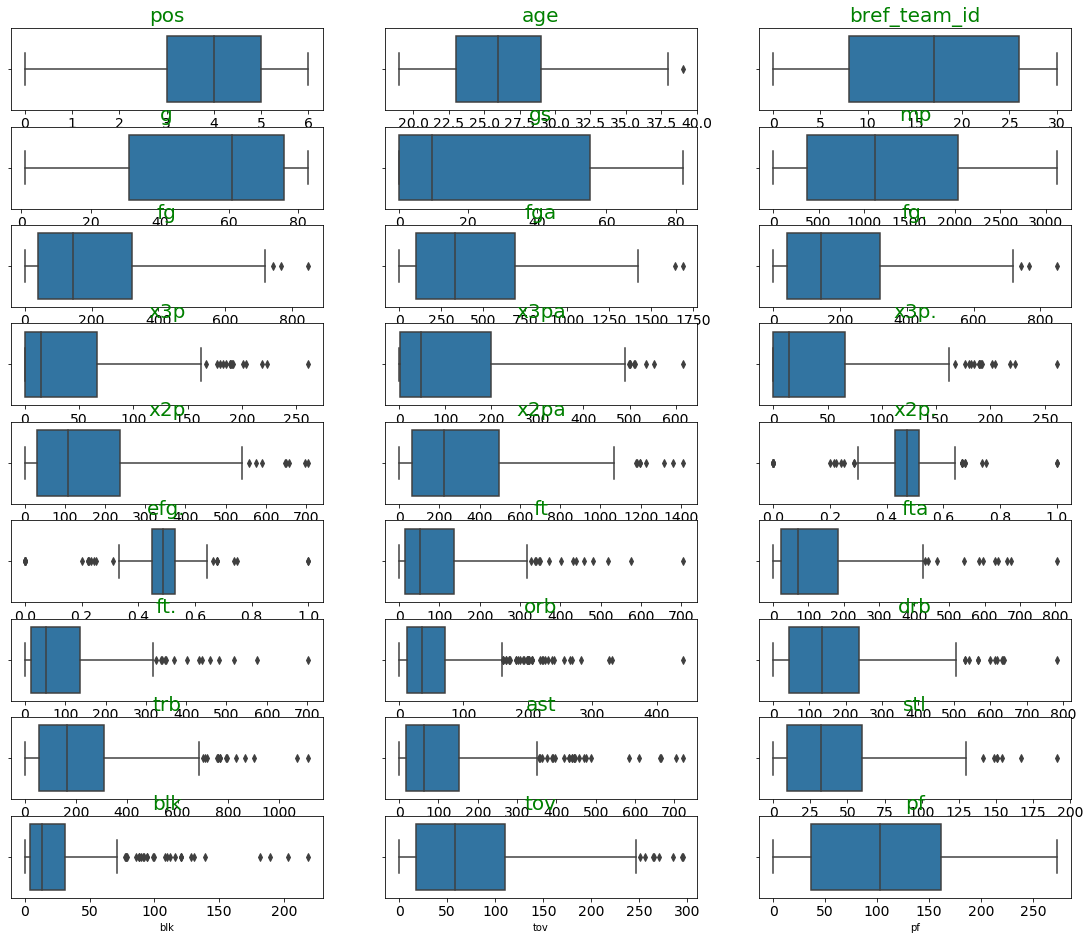

In [15]:
plt.figure(figsize=(19,16))


num_feat = train_x.select_dtypes(exclude=['object']).columns
    
for i in  range(27):
    plt.subplot(9,3, i + 1)
    sns.boxplot(x=train_x[num_feat[i]])
    plt.title(num_feat[i],color="g",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

plt.show()




### QR -Score - Inter Quartile Range
Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles,

##### IQR = Q3 − Q1.
The IQR is the first quartile subtracted from the third quartile;
These quartiles can be clearly seen on a box plot on the data.

In [16]:
train_x['pts'] = train_y

In [17]:
Q1 = train_x.quantile(0.25)
Q3 = train_x.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

pos                2.000000
age                6.000000
bref_team_id      18.000000
g                 45.000000
gs                55.250000
mp              1665.500000
fg               280.500000
fga              590.500000
fg.              280.500000
x3p               66.250000
x3pa             196.500000
x3p.              66.250000
x2p              207.000000
x2pa             432.250000
x2p.               0.085964
efg.               0.079500
ft               122.500000
fta              163.250000
ft.              122.500000
orb               59.500000
drb              193.750000
trb              256.000000
ast              135.500000
stl               51.000000
blk               27.500000
tov               92.000000
pf               124.750000
pts              733.750000
dtype: float64


In [18]:
nba_out = train_x[~((train_x < (Q1 - 1.5 * IQR)) |(train_x > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
nba_out.shape

(267, 28)

In [20]:
train_y = nba_out['pts'].copy()
train_x = nba_out.drop('pts', axis = 1).copy()

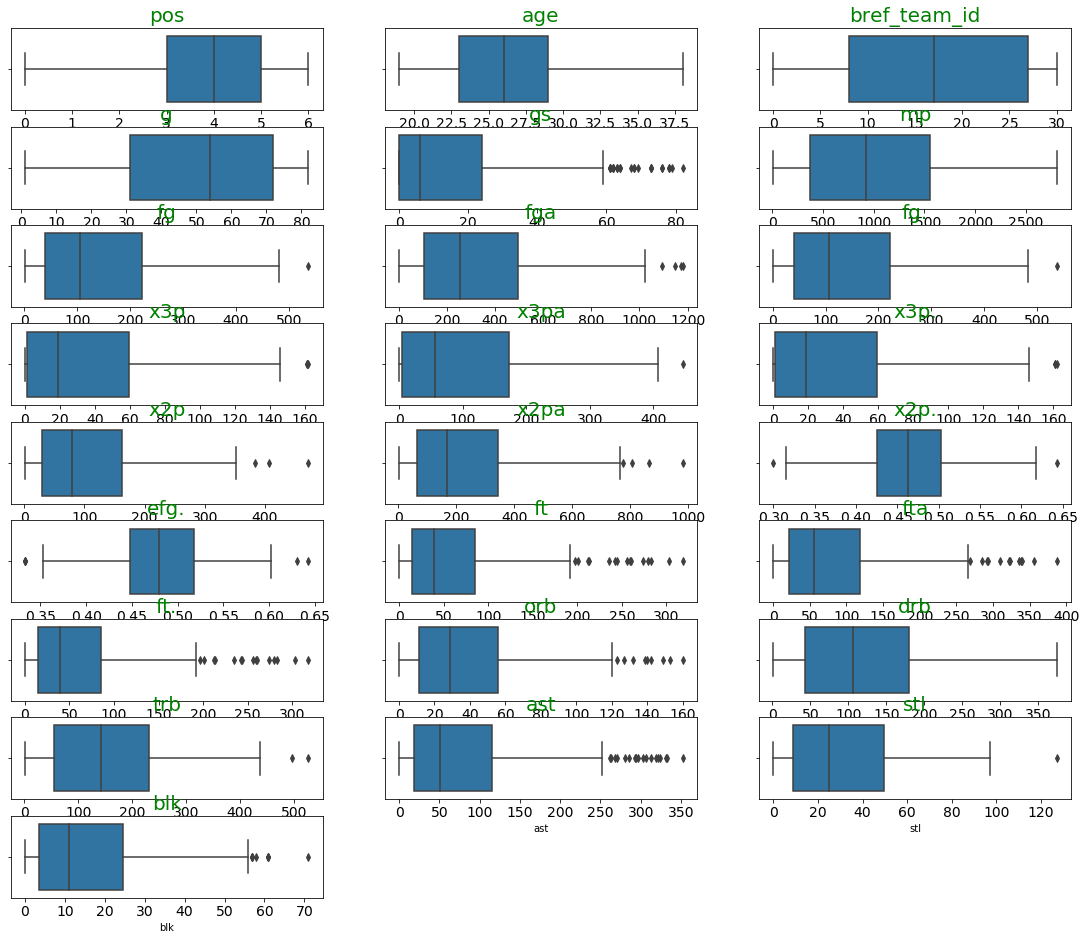

In [21]:
plt.figure(figsize=(19,16))


num_feat = train_x.select_dtypes(exclude=['object']).columns
    
for i in  range(25):
    plt.subplot(9,3, i + 1)
    sns.boxplot(x=train_x[num_feat[i]])
    plt.title(num_feat[i],color="g",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

plt.show()


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(train_x)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(test_x)
x_test = pd.DataFrame(x_test_scaled)

In [23]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_x, train_y)  #fit the model
    pred=model.predict(test_x) #make prediction on test set
    error = sqrt(mean_squared_error(test_y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 84.31788158296658
RMSE value for k=  2 is: 85.80621297765687
RMSE value for k=  3 is: 87.64986838131769
RMSE value for k=  4 is: 88.18589418376213
RMSE value for k=  5 is: 88.99767169432192
RMSE value for k=  6 is: 90.20810228695126
RMSE value for k=  7 is: 90.76947401059863
RMSE value for k=  8 is: 91.81807970981498
RMSE value for k=  9 is: 95.29559459915428
RMSE value for k=  10 is: 98.60838978546641
RMSE value for k=  11 is: 102.29648542124536
RMSE value for k=  12 is: 105.93757212015237
RMSE value for k=  13 is: 106.37065947132366
RMSE value for k=  14 is: 108.36481872111993
RMSE value for k=  15 is: 112.3512743277524
RMSE value for k=  16 is: 115.09201131958564
RMSE value for k=  17 is: 117.88598978955625
RMSE value for k=  18 is: 120.12006794951037
RMSE value for k=  19 is: 121.6734959432173
RMSE value for k=  20 is: 123.78275646861752


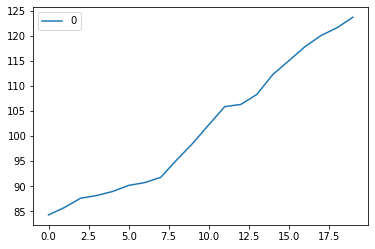

In [26]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [27]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(train_x,train_y)
model.best_params_

{'n_neighbors': 4}

In [28]:
model = neighbors.KNeighborsRegressor(n_neighbors = 4)

In [29]:
model.fit(train_x, train_y)  #fit the model
pred=model.predict(test_x) #make prediction on test set
error = sqrt(mean_squared_error(test_y,pred)) #calculate rmse
print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  20 is: 88.18589418376213
